In [1]:
import sys, os
import pandas as pd
import matplotlib.pyplot as plt
sys.path.insert(0,'F:/BitCoinDev/')
os.chdir('/BitCoinDev/BitCoinDev_Pycharm/')
os.path.abspath(os.curdir)


'F:\\BitCoinDev\\BitCoinDev_Pycharm'

In [23]:
from autotrading.db.mongodb import mongodb_handler
mongodb = mongodb_handler.MongoDBHandler("local","coiner","price_info")

query = {
    "cointype": "ADA",
    "Currency_Trade":"Bithumb",
    "year" : 2018,
    "month" : 7
}
result = mongodb.find_items(query)

result = list(result)
df = pd.DataFrame(result, columns=["timestamp","transaction_date","cointype","amount","price","hour","minute","second"])
df['amount']=df['amount'].astype(float)
df['price']=df['price'].astype(float)
df
# df.sort_values(by='transaction_date',ascending=True)

,timestamp,transaction_date,cointype,amount,price,hour,minute,second
0,1.531041e+09,2018-07-08 18:16:42,ADA,10695.142800,182.0,18,16,42
1,1.531041e+09,2018-07-08 18:15:52,ADA,225.447400,182.0,18,15,52
2,1.531041e+09,2018-07-08 18:15:52,ADA,95.888000,182.0,18,15,52
3,1.531042e+09,2018-07-08 18:18:38,ADA,102.000000,181.0,18,18,38
4,1.531041e+09,2018-07-08 18:16:42,ADA,10695.142800,182.0,18,16,42
5,1.531041e+09,2018-07-08 18:15:52,ADA,225.447400,182.0,18,15,52
6,1.531042e+09,2018-07-08 18:28:11,ADA,12061.939560,182.0,18,28,11
7,1.531042e+09,2018-07-08 18:27:54,ADA,21578.676800,181.0,18,27,54
8,1.531042e+09,2018-07-08 18:27:54,ADA,2366.071800,181.0,18,27,54
9,1.531046e+09,2018-07-08 19:32:12,ADA,911.722600,181.0,19,32,12


<Figure size 432x288 with 0 Axes>

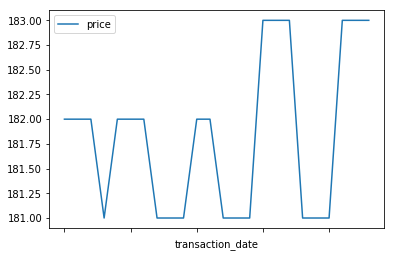

In [10]:
plt.figure()
df[df.cointype=='ADA'].plot(x='transaction_date',y='price')

### * 분 단위 평균가격으로 평균가격으로 groupby해서 그래프를 그려보자

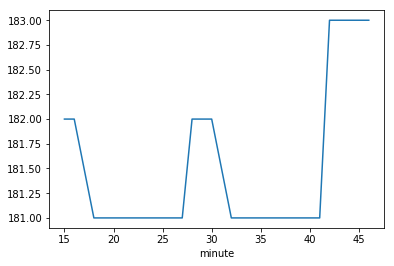

In [24]:
df[df.cointype=="ADA"].groupby('minute').mean()['price'].plot()

### * 분당 거래량을 bar그래프로 그려보자. groupby를 수행한 후 sum() 함수를 이용해보자

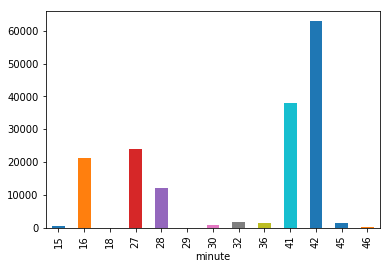

In [18]:
df[df.cointype=="ADA"].groupby('minute').sum()['amount'].plot(kind='bar')